### COM361 &mdash; Introdução a Otimização &mdash; 2022, Prof. Amit ###

# 2. Estratégia de controle ótimo para diminuir espalhamento de fake news em mídia social 				 #

#### Julia Vaisburd Xexéo  (julia.xexeo@poli.ufrj.br), Ney Rafael Guindane da Silva Barbosa (ney.barbosa@poli.ufrj.br)

*****

### Índice

1. [Introdução](#1.-Introdução)
1. [Modelo Matemático](#2.-Modelo Mathemático)
1. [Solução](#3.-Solução)
1. [Resultados e Discussão](#4.-Resultados-e-discussão)
1. [Conclusão](#5.-Conclusão)

## 1. Introdução ##

Nos últimos anos, com o advento das redes sociais e sua disseminação, o espalhamento de fake news, notícias falsas, aumentou e foi potencializado pela rapidez desses novos meios de comunicação. Eventos como as eleições americanas em 2016, Brasileiras em 2018 e a epidemia de Covid 19, foram marcados pelo alto número de noticias falsas disseminadas nas redes sociais.

O nosso projeto tem como objetivo buscar o controle ótimo e também um preditivo de um modelo de espalhamento de fake news nas redes sociais, proposto por   Muhlmeyer e Agarwal(2021,cap 15). 

No cenário que estamos considerando as noticias falsas são disseminadas não apenas em canais duvidosos, mas também em canais de noticias confiáveis da internet. Além disso, o governo está ciente que isso é uma possível ameaça e irá tomar medidas para converter e prevenir essa epidemia de falsas informações, antes que vire um pânico.

Por sorte, o governo tem acesso a modernas ferramentas de alerta e canais de distribuição direta de noticias, e é importante ressaltar que não importa para o governo se a noticia é realmente falsa ou verdadeira, apenas se ele quer diminuir ou aumentar o espalhamento da mesma. 

Levaremos em consideração que essa epidemia de informação começou antes do governo ficar ciente de seu perigo e assim parte da população já está espalhando as noticias e as recebendo.

O modelo de espalhamento de Fake News se assemelha a um modelo de pandemia, onde há os infectados, que podem espalhar a doença, então no nosso caso serão chamados de espalhadores, que podem espalhar a notícia. Os não infectados, que no nosso caso serão chamados de ignorantes, que ainda podem se infectar e espalhar a notícia e os curados, que não se contaminam mais e assim não podem espalhar mais a notícia. 

No nosso modelo, não mostramos diretamente os curados, será algo implícito, o gráfico de população só terá espalhadores e ignorantes, então a diferença percentual para chegar a 100\% da população será o número de curados.   

Dessa forma , o objetivo do nosso controle será  impedir que as notícias falsas ganhem uma vida própria substancial dentro das redes sociais.

Assim, primeiramente a partir da perspectiva de controle sera definida a função objetiva e a estratégia de controle ótimo. Após a otimização dessa função, será introduzida restrições orçamentárias ao controle.
Depois, será proposto um modelo de controle em tempo real e estudaremos se os controles calculados são válidos na presença de incertezas.

## 2. Modelo matemático ##


Primeiramente temos as equações dinâmicas do problema , em que x\_1 é o número de ignorantes e x\_2 de espalhadores, o objetivo do controle é prevenir a fakenews de ser amplamente espalhada e assim, se uma porcentagem suficiente da população esta imunizada dessa noticia falsa, não ocorrerá um pandemia da notícia falsa.

Uma estratégia de imunização é a educação antes da noticia chegar ao ignorante, que funcionaria parecido com a vacinação, pois ao ser "vacinado" com a informação correta, o ignorante não espalhará a notícia falsa.

Com um baixo número de espalhadores e alto número de ignorantes educados, a noticia falsa não será amplamente divulgada. 

O número de ignorante e espalhadores no nosso sistema podem ser modelados pelas seguintes equações, em que $\beta$ e $\gamma$ são parâmetros utilizados nos sistemas epidemiológicos, representando a taxa de espalhamento e a taxa de diminuição, respectivamente. 

\begin{align*}
    &\dot{x_1}(t) = -\beta x_1(t)x_2(t) - b u(t) x_1(t)\\
    &\dot{x_2}(t) = \beta x_1(t)x_2(t) - \gamma x_2^2(t)
\end{align*}

$b u(t) x_1(t) $ é o nosso controle, que é a tentativa de reduzir o número de ignorantes por meio da educação. 

Para a formulação matemática teremos que discretizar a equação dinâmica, dessa forma obtendo as equações abaixo:

\begin{align*}
    &x\_1[k+1] =  x\_1[k] - \beta * x\_1[k] * x\_2[k] - b * u[k] * x\_1[k]\\
    &x\_2[k+1] = x\_2[k] + \beta * x\_1[k] * x\_2[k] - \gamma * x\_2[k] * x\_2[k]
\end{align*}

Além disso, teremos algumas restrições no sistema. Espalhadores, ignorantes e controle sempre positivos e soma dos espalhadores com ignorantes deverá ser menor que $\beta$ sobre $\gamma$

\begin{align*}
    &x\_1[k] \geq 0\\
    &x\_2[k] \geq 0\\
    &u[k] \geq 0\\
    &x\_1[k] + x\_2[k] \leq (\beta / \gamma)\\
\end{align*}

O valor inicial de $x_1$ e $x_2$ será definido de forma que a soma inicial dele deve ser igual a 1, representando assim 100\% da população.

Por fim, teremos nossa função objetiva, em que desejamos chegar em um nível de imunização em um determinado tempo:

\begin{align*}
    J =\|{x_1(t) + x_2(t) - \frac{\gamma}{\beta}}\|^2
\end{align*}

Dessa forma, temos que a formulação do problema é:

$$
\begin{aligned}
\underset{x_1, x_2 \in \mathbb{R^n}}{\text{minimize}}\qquad&  \sum_{n=1}^{k} (x_1(k) + x_2(k) - \frac{\gamma}{\beta})^2 \\
\text{sujeito a:}\qquad& x_1[k], x_2[k], u[k] \geq 0\\
&x_1[k] + x_2[k] \leq (\gamma / \beta)\\
& x_1[k+1] = x_1[k] - \beta * x_1[k] * x_2[k] - b * u[k] * x_1[k]\\ 
& x_2[k+1] = x_2[k] + \beta * x_1[k] * x_2[k] - \gamma * x_2[k] * x_2[k]\\
\end{aligned}\\
$$

## 3. Solução ##



In [35]:
#DEFININDO PACOTES A SEREM UTILIZADOS
@time using Clp
@time using JuMP
@time using Plots
@time using Ipopt
@time using LinearAlgebra
@time using ImplicitEquations
@time using Mosek
@time using MosekTools
@time using Random
@time using PyPlot

  0.001896 seconds (277 allocations: 18.609 KiB)
  0.000767 seconds (277 allocations: 18.609 KiB)
  0.000722 seconds (277 allocations: 18.609 KiB)
  0.000769 seconds (277 allocations: 18.609 KiB)
  0.004186 seconds (605 allocations: 46.422 KiB)
  0.000896 seconds (277 allocations: 18.625 KiB)
  0.001263 seconds (277 allocations: 18.609 KiB)
  0.000715 seconds (277 allocations: 18.609 KiB)
  0.001372 seconds (277 allocations: 18.609 KiB)
  0.000827 seconds (277 allocations: 18.609 KiB)


Começaremos o código definindo as nossas constantes, que serão utilizadas ao longo do trabalho.

A taxa de espalhamento  $\beta$  escolhida foi 0.5
e a taxa de diminuição  $\gamma$ como 0.3.

Consideraremos que a população inicial é formada apenas por ignorantes e espalhadores iniciais, e assim, inicialmente 70% da nossa população será ignorante e 30% espalhadores de fake news.

Além disso, a constante b, que multiplica nosso controle, será 1 para não ter impacto no valor de U.

In [37]:
#PARAMETROS

b = 1
β= 0.5
γ = 0.3
k = 50
x_1_init = 0.7
x_2_init = 0.3
T = [ i for i=1:k ];

#### 3.1 controle ótimo no Horizonte [$1,k$] #####
Depois de definidas as constantes,será feito o cálculo do controle ótimo no Horizonte [$1,k$], em que k = 50.

In [39]:

#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ/β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt1 = JuMP.value.(u[1:k-2])
x_1opt1 = JuMP.value.(x_1[1:k-2])
x_2opt1 = JuMP.value.(x_2[1:k-2])
x12opt = x_1opt1+ x_2opt1;


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      248
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      199
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       49

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráficos 1 e 2 ####

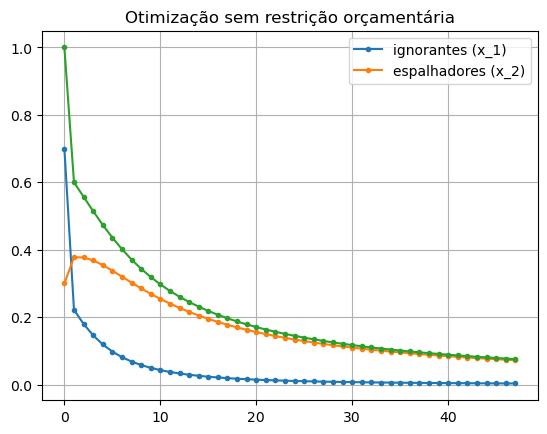

In [41]:
PyPlot.svg(true)
PyPlot.title("Otimização sem restrição orçamentária")
PyPlot.plot([x_1opt1 x_2opt1 x12opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()


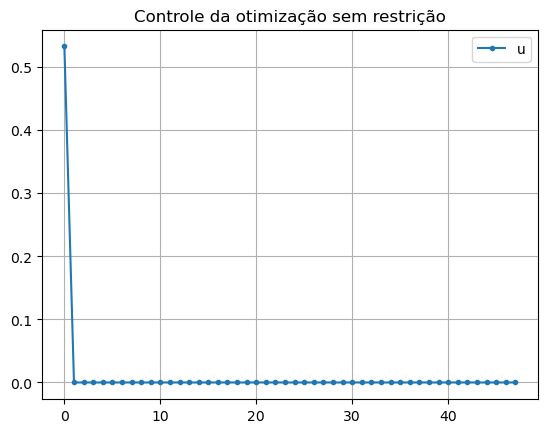

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [42]:
PyPlot.figure()
PyPlot.plot(uopt1,".-")
PyPlot.title("Controle da otimização sem restrição")
PyPlot.legend("u",loc="best")
PyPlot.grid()
PyPlot.figure()

É possível ver que nosso gráfico de ignorantes e espalhadores tem uma queda muito grande por causa da restrição $x_1[k] + x_2[k] <= (γ / β)$, iremos retirar essa restrição da parte transitória e ver como nosso sistema reage.

In [67]:
#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 9:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt1_ = JuMP.value.(u[1:k-2])
x_1opt1_ = JuMP.value.(x_1[1:k-2])
x_2opt1_ = JuMP.value.(x_2[1:k-2])
x12opt_ = x_1opt1_ + x_2opt1_;



This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      234
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      192
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       42

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráfico 3 ####

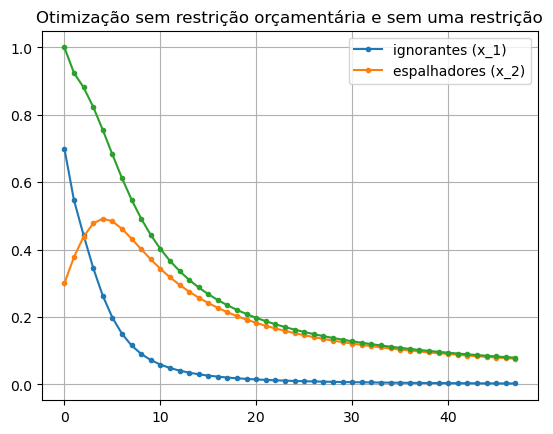

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [68]:
PyPlot.svg(true)
PyPlot.title("Otimização sem restrição orçamentária e sem uma restrição")
PyPlot.plot([x_1opt1_ x_2opt1_ x12opt_],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)"], loc="best")
PyPlot.grid()
PyPlot.figure()

#### 3.2 Otimização introduzindo restrições orçamentárias ao controle u ####

Agora, será introduzido um gasto máximo ao controle u, que sera u[k]<= 0.1, sendo mais uma restrição do nosso sistema.

$$
\begin{aligned}
\underset{x_1, x_2 \in \mathbb{R^n}}{\text{minimize}}\qquad&  \sum_{n=1}^{k} (x_1(k) + x_2(k) - \frac{\gamma}{\beta})^2 \\
\text{sujeito a:}\qquad& x_1[k], x_2[k], u[k] \geq 0\\
&x_1[k] + x_2[k] \leq (\gamma / \beta)\\
& x_1[k+1] = x_1[k] - \beta * x_1[k] * x_2[k] - b * u[k] * x_1[k]\\ 
& x_2[k+1] = x_2[k] + \beta * x_1[k] * x_2[k] - \gamma * x_2[k] * x_2[k]\\
& u[k] \leq 0.1\\
\end{aligned}\\
$$

In [61]:
#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k]-1 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 2:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
    @constraint(m, u[k] <= 0.1) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt2 = JuMP.value.(u[1:k-2])
x_1opt2 = JuMP.value.(x_1[1:k-2])
x_2opt2 = JuMP.value.(x_2[1:k-2])

x12_opt2 = x_1opt2 + x_2opt2;

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      294
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      245
        inequality constraints with only lower bounds:      147
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       98

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráfico 4 e 5 ####

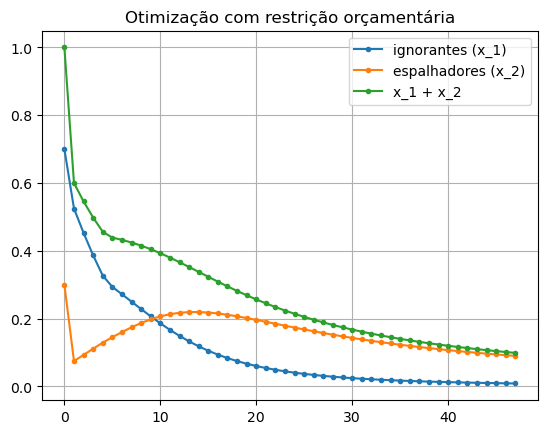

In [63]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2 x_2opt2 x12_opt2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()


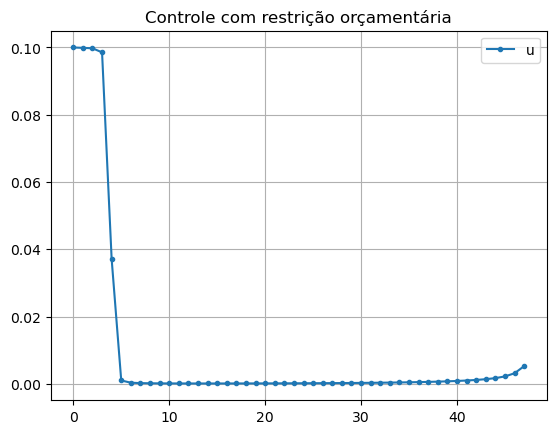

In [64]:
PyPlot.figure()
PyPlot.title("Controle com restrição orçamentária")
PyPlot.plot(uopt2,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

A restrição $x_1[k] + x_2[k] <= (γ / β)$ torna o sistema impossível, iremos, novamente, retirar essa restrição da parte transitória e ver como nosso sistema reage.

In [69]:
#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k]-1 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 9:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (γ / β)) 
end

for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - β * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + β * x_1[k] * x_2[k] - γ * x_2[k] * x_2[k])
    @constraint(m, u[k] <= 0.1) 
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (γ / β)).^2)) 

optimize!(m)

uopt2 = JuMP.value.(u[1:k-2])
x_1opt2_ = JuMP.value.(x_1[1:k-2])
x_2opt2_ = JuMP.value.(x_2[1:k-2])
x_12opt2_ = x_1opt2_ + x_2opt2_
;


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      280
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      238
        inequality constraints with only lower bounds:      147
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       91

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  3.6000000e-01 7.00e-01 8.88e-16  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráfico 6 ####

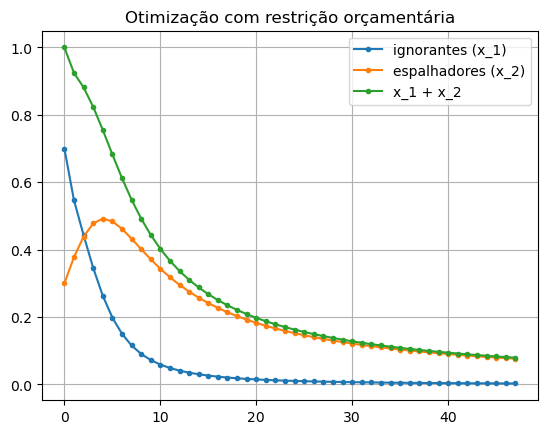

In [70]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2_ x_2opt2_ x_12opt2_],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()

#### 3.3 Controle Preditivo ####
Agora, utilizaremos o controle preditivo, em que ocorre a realimentação. O sistema é cálculado no horizonte k, mas pegamos apenas a primeira resposta do controle e recalculamos o sistema com esse novo passo.

In [71]:

x1 = zeros(k)
x2 = zeros(k)
uu = zeros(k-1)

x1[1] = x_1_init
x2[1] = x_2_init

for k in 1:T[50]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer, print_level=0))


    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m,  u >= 0) #controle

    @constraint(m, x_1 + x_2 <= (γ / β)) 
    @NLconstraint(m, x_1 == x1[k] - β * x1[k] * x2[k] - b * u * x1[k])
    
    @NLconstraint(m, x_2 == x2[k] + β * x1[k] * x2[k] - γ * x2[k] * x2[k])
    @constraint(m, u <= 0.1) 
    @objective(m, Min, sum((x_1 + x_2 - (γ / β)).^2)) 
    
    optimize!(m)
    x1[k+1] = JuMP.value(x_1)
    x2[k+1] = JuMP.value(x_2)
    uu[k] = JuMP.value(u)
    
end
x12 = x1 + x2;


##### Gráfico 7 e 8 ####

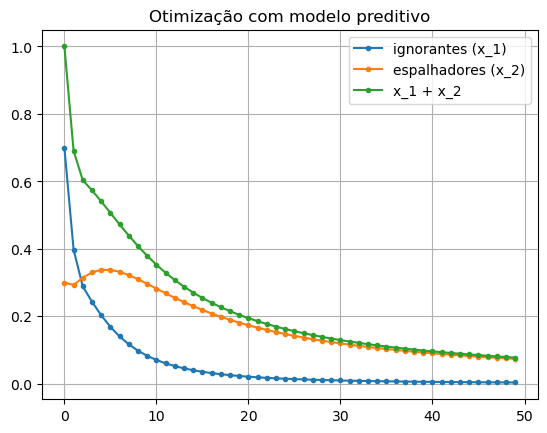

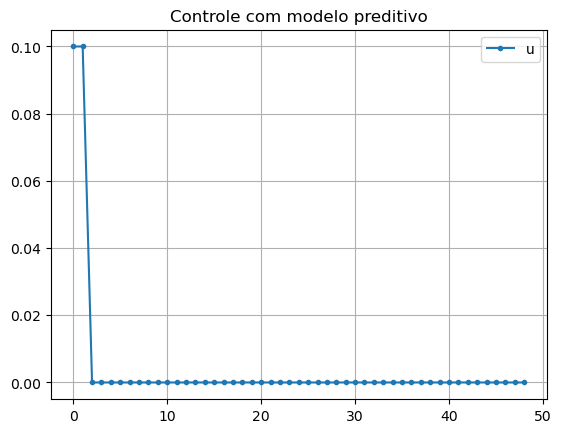

In [72]:

PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1 x2 x12],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Controle com modelo preditivo")
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

Modelo com controle preditivo sem a retrição $x_1 + x_2 <= (γ / β)$ para torná-lo possível.

In [73]:
x1_ = zeros(k)
x2_= zeros(k)
uu_ = zeros(k-1)

x1_[1] = x_1_init
x2_[1] = x_2_init

for k in 1:T[50]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer, print_level=0))


    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m,  u >= 0) #controle

    #@constraint(m, x_1 + x_2 <= (γ / β)) 
    @NLconstraint(m, x_1 == x1_[k] - β * x1_[k] * x2_[k] - b * u * x1_[k])
    
    @NLconstraint(m, x_2 == x2_[k] + β * x1_[k] * x2_[k] - γ * x2_[k] * x2_[k])
    @constraint(m, u <= 0.1) 
    @objective(m, Min, sum((x_1 + x_2 - (γ / β)).^2)) 
    
    optimize!(m)
    x1_[k+1] = JuMP.value(x_1)
    x2_[k+1] = JuMP.value(x_2)
    uu_[k] = JuMP.value(u)
    
end
x12_ = x1_ + x2_;

#### Gráfico 9 e 10 #### 

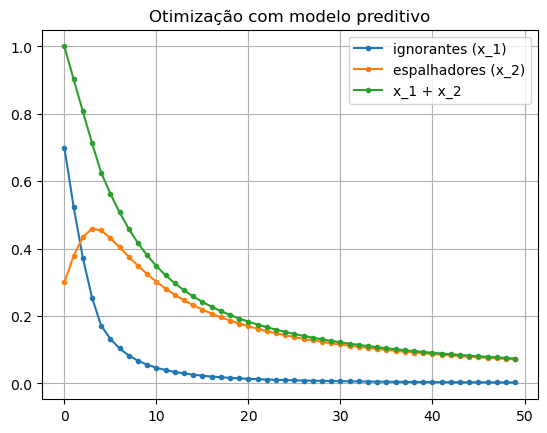

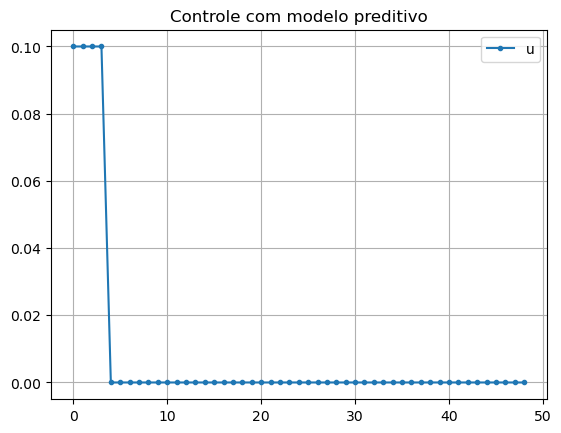

In [74]:

PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1_ x2_ x12_],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Controle com modelo preditivo")
PyPlot.plot(uu_,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

#### 3.4 Inserção de incertezas no modelo de controle ótimo ####

Utilizando incertezas no valor de $\beta$ e $\gamma$, calculamos o nosso controle ótimo em todo o horizonte k.


In [55]:
#PARAMETROS
rng = MersenneTwister(1234) #    b=rand!(rng, zeros(1))/2
gama = zeros(50)
beta = zeros(50)

i = 2
gama[1] = 0.3
beta[1] = 0.5

while i<=50
    gama[i] = round(gama[i-1] + 0.001, digits =3)
    beta[i] = round(beta[i-1] + 0.009, digits =3)
    i = i + 1
end

In [75]:
#nomeando o modelo e especificando o solver
m = Model(with_optimizer(Ipopt.Optimizer))


#definindo as variavéis
@variable(m, x_1[1:T[k]]) # ignorantes
@variable(m, x_2[1:T[k]])  #spreaders
@variable(m, u[1:T[k]]) #controle



#restrições
for k in 1:T[k] 
    @constraint(m, x_1[k] >= 0)
    @constraint(m, x_2[k] >= 0)
    @constraint(m, u[k] >= 0)
end

@constraint(m, x_1[1] == x_1_init)
@constraint(m, x_2[1] == x_2_init)

for k in 9:T[k] 
    @constraint(m, x_1[k] + x_2[k] <= (gama[k] / beta[k])) 
end
for k in 1:T[k]-1 
    @NLconstraint(m, x_1[k+1] == x_1[k] - beta[k] * x_1[k] * x_2[k] - b * u[k] * x_1[k])
    @NLconstraint(m, x_2[k+1] == x_2[k] + beta[k] * x_1[k] * x_2[k] - gama[k] * x_2[k] * x_2[k])
end

@objective(m, Min, sum((x_1[k] + x_2[k] - (gama[k] / beta[k])).^2)) 

optimize!(m)

uopt3 = JuMP.value.(u[1:48])
x_1opt3 = JuMP.value.(x_1[1:48])
x_2opt3 = JuMP.value.(x_2[1:48])
x_12opt3 = x_1opt3 + x_2opt3;


This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      345
Number of nonzeros in inequality constraint Jacobian.:      234
Number of nonzeros in Lagrangian Hessian.............:      395

Total number of variables............................:      150
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      100
Total number of inequality constraints...............:      192
        inequality constraints with only lower bounds:      150
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       42

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  1.3755349e-01 7.00e-01 5.00e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

#### Gráfico 11 e 12 ####

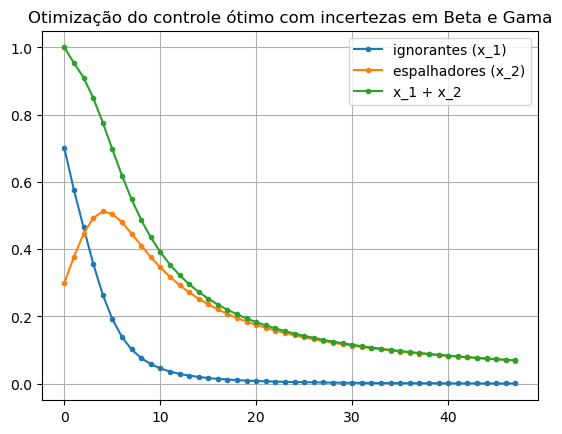

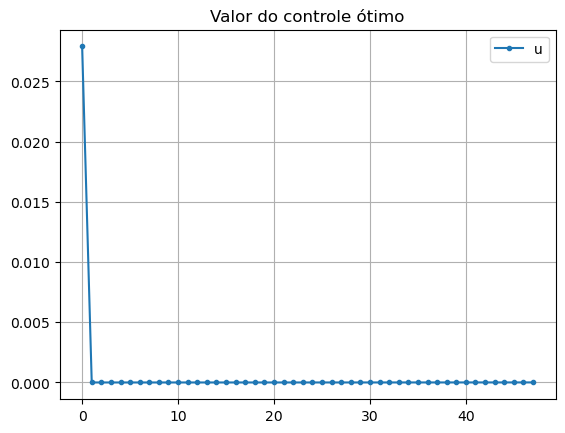

In [76]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle ótimo com incertezas em Beta e Gama")
PyPlot.plot([x_1opt3 x_2opt3 x_12opt3],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Valor do controle ótimo")
PyPlot.plot(uopt3,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

#### 3.5 Inserção de incertezas no modelo de controle preditivo ####

Agora, colocaremos incertezas nos valores de $\beta$ e $\gamma$ e faremos a otimização com o controle preditivo.

In [77]:

x11 = zeros(k)
x21 = zeros(k)
uu1 = zeros(k-1)

x11[1] = x_1_init
x21[1] = x_2_init

for k in 1:T[50]-1
    #nomeando o modelo e especificando o solver
    m = Model(with_optimizer(Ipopt.Optimizer,print_level=0))

    #definindo as variavéis
    @variable(m, x_1 >= 0) # ignorantes
    @variable(m, x_2 >= 0)  #spreaders
    @variable(m, 0.01>= u >= 0) #controle

    #@constraint(m, x_1 + x_2 <= (gama[k] / beta[k])) 
    @NLconstraint(m, x_1 == x11[k] - beta[k] * x11[k] * x21[k] - b * u * x11[k])
    
    @NLconstraint(m, x_2 == x21[k] + beta[k] * x11[k] * x21[k] - gama[k] * x21[k] * x21[k])
    
    @objective(m, Min, sum((x_1 + x_2 - (gama[k] / beta[k])).^2)) 
    
    optimize!(m)
    x11[k+1] = JuMP.value(x_1)
    x21[k+1] = JuMP.value(x_2)
    uu1[k] = JuMP.value(u)
    
end
x121 = x11 + x21;


##### Gráfico 13 e 14 ####

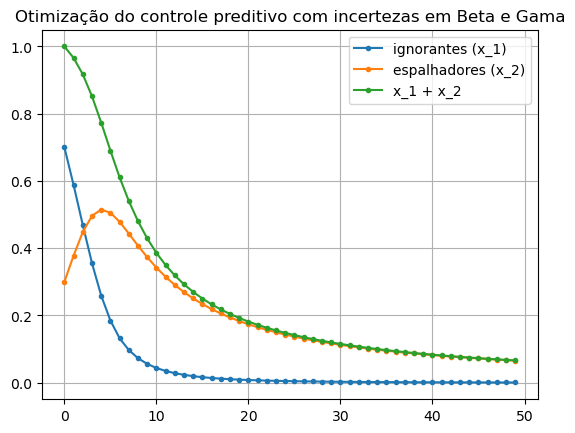

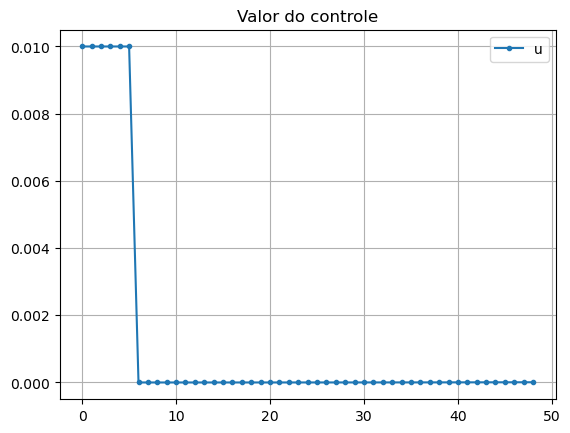

In [78]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle preditivo com incertezas em Beta e Gama")
PyPlot.plot([x11 x21 x121],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Valor do controle")
PyPlot.plot(uu1,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

## 4. Resultados e Discussões ##

### 4.1 Controle ótimo sem restrição orçamentária ###
Após o desenvolvimento dos códigos acima é possível observar que ao montarmos o modelo de controle ótimo no horizonte k, sem restrições orçamentárias para o controle,  percebemos, observando o gráfico 1 e 2 que inicialmente a população de espalhadores aumenta e de ignorantes diminui, depois de um tempo, a população de espalhadores se estabiliza em um valor baixo, e o amplo espalhamento de notícias falsas deixa de ser um risco. Além disso, podemos ver quando não temos uma restrição de controle, o mesmo tem um pico inicial e o problema acaba sendo solucionado muito rápido.

Dessa forma, vemos que o controle ótimo do nosso sistema consegue solucionar o problema para os parâmetros determinados.

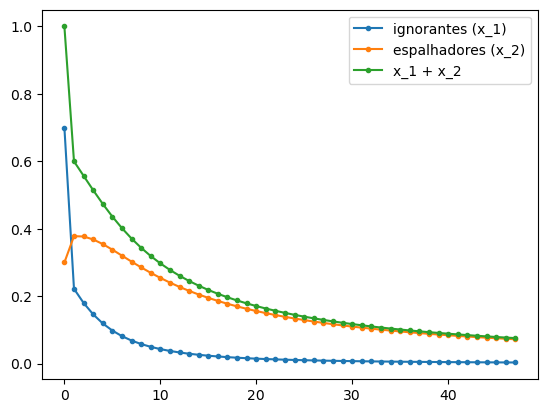

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [80]:

PyPlot.svg(true)
PyPlot.plot([x_1opt1 x_2opt1 x12opt],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.figure()

Vemos na imagem acima que há um diminuição muito agressiva do número de ignorantes e um aumento considerável do número de espalhadores, isso se deve a essa restrição $x_1[k] + x_2[k] <= (γ / β)$, ao retirarmos essa restrição da parte transitória do sistema, como veremos no gráfico abaixo, percebemos que fica mais suave a transição dos pontos, algo que representaria melhor a realidade e evitaria o controle de ser algo tão abrupto no ponto inicial.

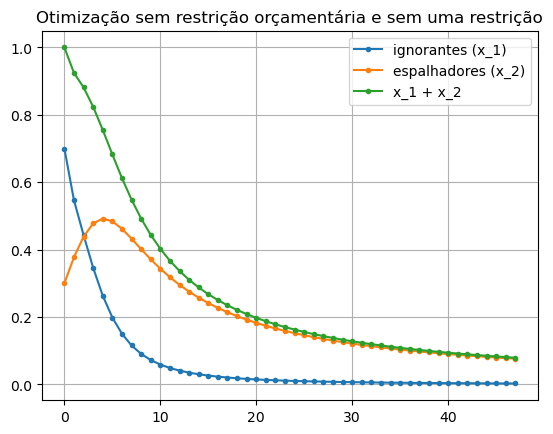

Figure(PyObject <Figure size 640x480 with 0 Axes>)

In [79]:
using PyPlot
PyPlot.svg(true)
PyPlot.title("Otimização sem restrição orçamentária e sem uma restrição")
PyPlot.plot([x_1opt1_ x_2opt1_ x12opt_],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()

### 4.2 Controle ótimo com restrição orçamentária ###
Na restrição orçamentária, nos gráficos 4 e 5, podemos ver que o decaimento da população ignorante é mais suave e o controle atinge o máximo estipulado pela restrição algumas vezes até chegar em um nível que deixa de ser necessário. Quando olhamos o número de espalhadores, vemos que ocorre um decaimento do número de espalhadores antes de subir, isso ocorre pois temos uma restrição em que a soma de espalhadores e de ingnorantes não pode ser maior que a razão $\gamma$/$\beta$. Dessa forma, o sistema não é possível com todas as restrições impostas.



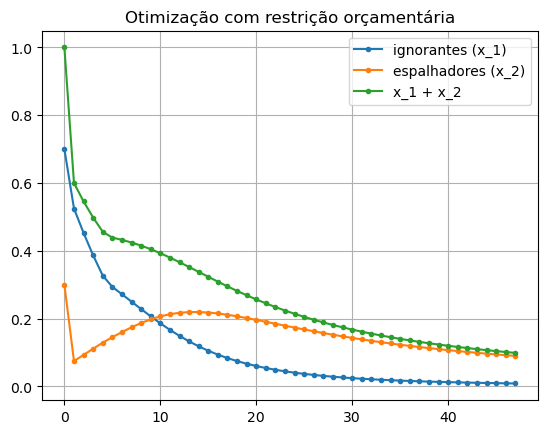

In [83]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2 x_2opt2 x12_opt2],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()


Para torna o sistema possível iremos utilizar a ideia de retirar a restrição da parte transitória. Com isso nosso sistema se torna possível e podemos analisar e comparar com o da questão anterior. Olhando para o gráfico, percebemos que o mesmo é muito parecido com o gráfico 2.Observando o controle nota-se que esse tem um máximo,independente da restrição, e que o nosso sistema converge mesmo assim, mas atingindo um valor maior no número de espalhadores. Portanto, nesse caso, a restrição orçamentária não influencia tanto o sistema, mas causa uma piora na estabilidade ao longo do tempo.

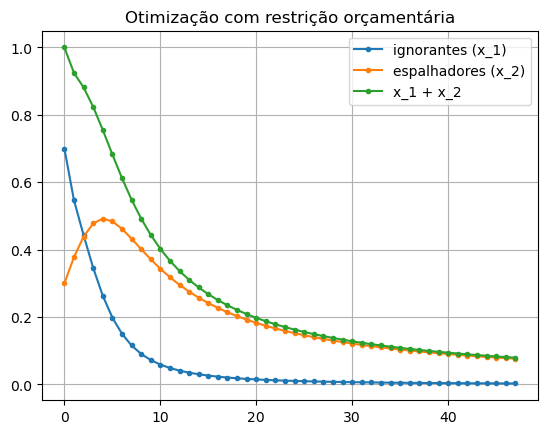

In [85]:

PyPlot.svg(true)
PyPlot.title("Otimização com restrição orçamentária")
PyPlot.plot([x_1opt2_ x_2opt2_ x_12opt2_ ],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()


### 4.3 Controle preditivo ###
Quando utilizamos o controle preditivo, o sistema deixa de ser  em malha aberta para ser um sistema realimentado. O nosso controle preditivo é apenas um passo a frente. Nosso sistema também conta com uma restrição orçamentária para que não ocorra um valor muito alto como ocorre no primeiro exemplo. 

Analisando o gráfico, vemos que há um decaimento do valor de espalhadores, algo não muito esperado que  ocorre por causa da restrição  $ $x_1[k] + x_2[k] <= (γ / β)$. Porém, devido a realimentação, o sistema se suaviza após esse ponto e impede um descontrole,  como esperado.

O valor do controle  se diferência do controle ótimo, vemos aqui que ao colocar um valor limite o controle chega nesse ponto várias vezes até chegar num ponto em que ele se torna desnecessário.

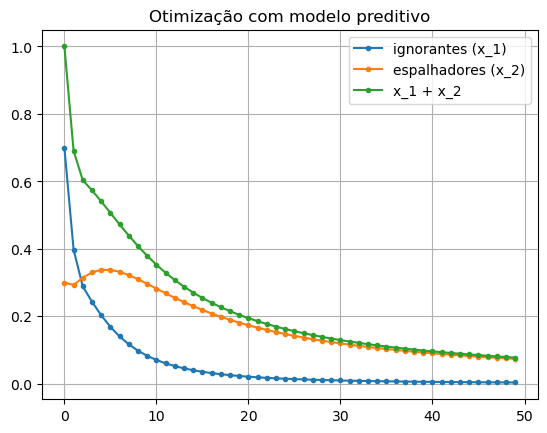

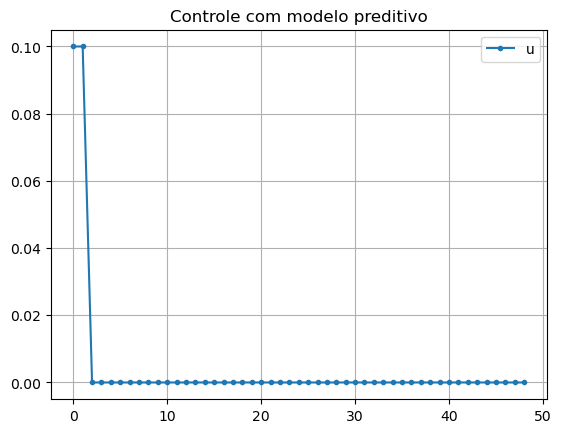

In [86]:
PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1 x2 x12],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Controle com modelo preditivo")
PyPlot.plot(uu,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()

Quando retiramos a restrição $\gamma$/$\beta$, vemos um sistema  comportado. O decaimento do número de ignorantes é alto, mas nada fora do esperado já que existe o controle atuando para tal.

Uma comparação importante da realimentação com o controle ótimo é o número de espalhadores ser menor no pico, enquanto no controle ótimo ele chega bem perto de 0.5, no controle preditivo ele tem um distanciamento maior. Dessa forma, a realimentação se demonstra um sistema muito importante para diminuição das chances de uma pandemia de fake news. Outra diferença é o valor do controle que aumentou ao retirar essa restrição.

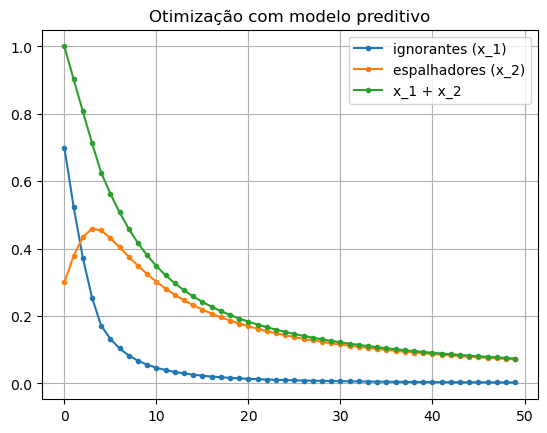

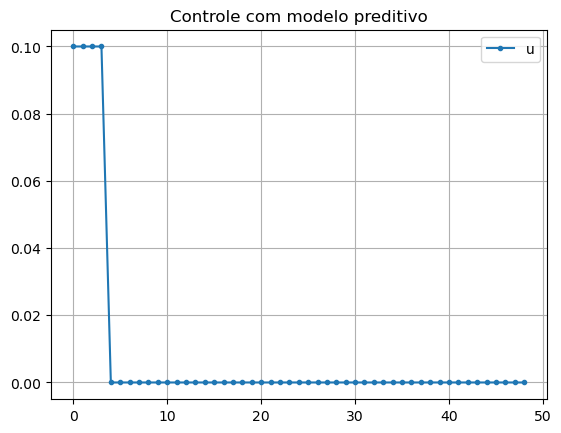

In [87]:

PyPlot.svg(true)
PyPlot.title("Otimização com modelo preditivo")
PyPlot.plot([x1_ x2_ x12_],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Controle com modelo preditivo")
PyPlot.plot(uu_,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()


#### 4.4 Inserção de incertezas no modelo de controle ótimo ####

Incluindo incerteza nos valores de $\beta$ e $\gamma$ no nosso modelo de controle ótimo,aumentando os dois valores em cada passo do sistema em quantidades diferentes e retirando a restrição de $\gamma$/$\beta$, temos um sistema muito parecido com o de controle ótimo sem incerteza.  Entretanto vemos que por causa da incerteza o valor de pico de espalhadores é maior, algo muito preocupante já que ele representa mais da metade da população espalhando fake news, o que poderia causar a pandemia de mentiras. Felizmente, o modelo consegue evitar a pandemia, cumprindo o objetivo dele.

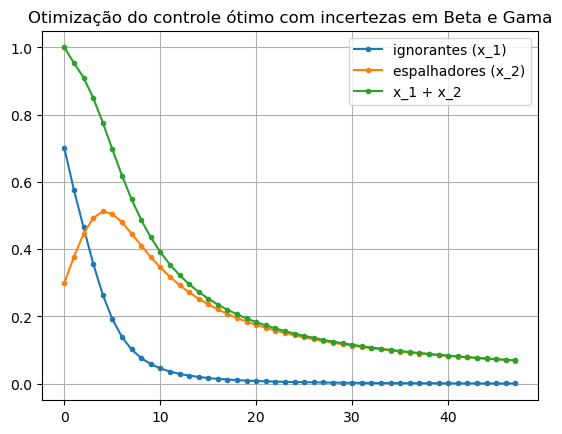

In [88]:

PyPlot.svg(true)
PyPlot.title("Otimização do controle ótimo com incertezas em Beta e Gama")
PyPlot.plot([x_1opt3 x_2opt3 x_12opt3],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()


#### 4.5 Inserção de incertezas no modelo de controle preditivo ####
A inclusão de incertezas no modelo preditivo não alterou muito o funcionamento do mesmo, assim como no sistema de controle ótimo com incerteza, o sistema acabou tendo uma performance pior se comparado ao sem incerteza, podemos ver isso tanto pelo valor máximo que os espalhadores chegam quanto pro valor de conntrole que tem que trabalhar mais, mas apesar desses detalhes ele cumpre a função de evitar a pandemia.


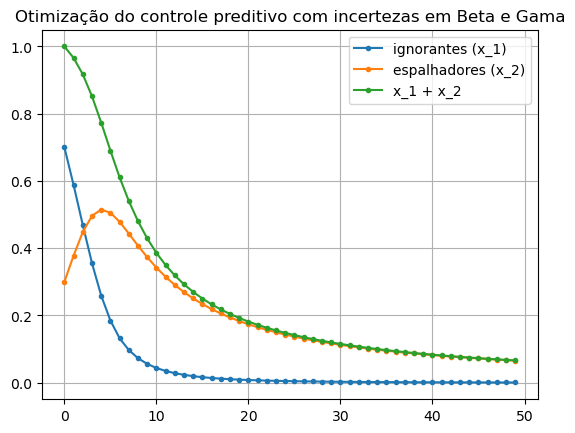

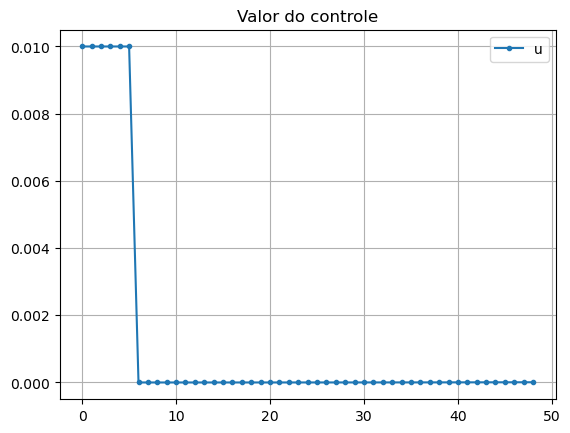

In [89]:
PyPlot.svg(true)
PyPlot.title("Otimização do controle preditivo com incertezas em Beta e Gama")
PyPlot.plot([x11 x21 x121],".-")
PyPlot.legend(["ignorantes (x_1)", "espalhadores (x_2)", "x_1 + x_2"], loc="best")
PyPlot.grid()
PyPlot.figure()
PyPlot.title("Valor do controle")
PyPlot.plot(uu1,".-")
PyPlot.legend("u",loc="best")
PyPlot.grid()


## 5. Conclusão ##



A partir dos dados apresentados durante esse relatório, vemos que é importante a modelagem e tentativa de resolução de um problema de várias formas, em que cada uma adiciona novas informações, detalhes e possíveis problemas na modelagem da situação proposta, um exemplo disso é a existência da restrição $x_1 + x_2 <= \gamma/\beta$ que em alguns casos tornava a solução do sistema impossível.

O controle ótimo demonstrou ter uma eficácia muito boa quando não existem l e até mesmo quando existem limites orçamentários
Quando vamos para o controle preditivo vemos o ganho na parte de suavização do sistema, os valores de pico ficam menores se comparados ao sistema com controle ótimo nas mesmas condições, com restrição orçamentária e sem a restrição de $\gamma$/$\beta$ no período transitório para o controle ótimo e em todo o sistema para o preditivo.

Por último vemos os efeitos de alguma incerteza nos valores de $\beta$ e $\gamma$ que nessse caso geraram uma elevação dos valores de espalhadores se comparados a seus pares sem incerteza.

O sistema se mostrou bem comportado para diversas situações e em quase todos os casos, entretanto ele aparenta ser modelado de um forma que converge sempre, o que causa um certo estranhamento e levanta a questão se era o objetivo ou se ocorreu algum erro na modelagem teórica ou namatemática do sistema. 

## 6. Referências ##

MUHLMEY, Michael. AGARWAL,Shaurya. Information Spread in a Social Media Age: Modeling and Control. primeira edição. Boca Rato, FR: CRC PRESS, 2021.

BHAYA, Amit . Slides das aulas de Introdução a otimização, UFRJ, 2021.2
